In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Loading Data

In [3]:
data=pd.read_csv('data_for_lr.csv')

In [4]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# Data Preprocessing

### handling null values

In [6]:
data=data.dropna()

In [7]:
print("Shape of the dataset= {}".format(data.shape))

Shape of the dataset= (699, 2)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### splitting data

In [9]:
# training dataset and labels

In [12]:
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)
# valid dataset and labels
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

#print the shapes
print("Train Input Shape = {}".format(train_input.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# Linear Regression

## Forward Propogation

#### f(x) = m*x + c ; where m and c are the parameters that or model will learn through training.

In [13]:
def forward_propagation(train_input,parameters):
    m=parameters['m']
    c=parameters['c']
    predictions =np.multiply(m,train_input)+c
    return predictions

## Defining cost function

### Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5

### where y are the actual or true values and f(x) are the predicted values.

In [15]:
def cost_function(predictions, train_output):
    cost=np.mean((train_output-predictions)**2)*0.5
    return cost

### Gradient Descent for Backpropagation
Using Chain Rule:

cost
f = f(x)
Partial Derivative of cost function w.r.t m **dcost/dm = dcost/df * df/dm **

Partial Derivative of cost function w.r.t c **dcost/dc = dcost/df * df/dc **

Partial Derivatives:

dc/df = (y - f) * -1

df/dw = x

df/db = 1

In [17]:
def backward_propagation(train_input,train_output,predictions):
    derivatives=dict()
    df=(train_output-predictions)*-1
    dm=np.mean(np.multiply(train_input,df))
    dc=np.mean(df)
    derivatives['dm']=dm
    derivatives['dc']=dc
    return derivatives

## Update the Parameters
m = m - (learning_rate * dm

c = c - (learning_rate * dc)

In [18]:
def update_parameter(parameters,derivatives,learning_rate):
    parameters['m']=parameters['m']-learning_rate* derivatives['dm']
    parameters['c']=parameters['c']-learning_rate* derivatives['dc']
    return parameters

# Train the Data
## 
Sequence of Steps:

Forward Propagtaion
Cost Function
Backward Propagation
Update Parametersmeters

In [25]:
def train(train_input,train_output,learning_rate,iters):
    # random parameters
    parameters=dict()
    parameters['m']=np.random.uniform(0,1) *-1
    parameters['c']=np.random.uniform(0,1) *-1

    plt.figure()
    #loss
    loss=list()
    # iteration
    for i in range(iters):
        #forward propagation
        predictions=forward_propagation(train_input,parameters)
        #cost
        cost=cost_function(predictions,train_output)
        loss.append(cost)
        print(f"iteration={i+1,},Loss={cost}")
        #plot
        fig,ax=plt.subplots()
        ax.plot(train_input,train_output,'+',label="Original")
        ax.plot(train_input,predictions,'*',label="Training")

        legend=ax.legend()
        plt.plot(train_input,train_output,'+',label="Original")
        plt.plot(train_input,predictions,'*',label="Training")
        plt.show()
        #backpropagation
        derivatives=backward_propagation(train_input,train_output,predictions)
        #update the parameters
        parameters=update_parameter(parameters,derivatives,learning_rate)
    return parameters

##  Training

iteration=(1,),Loss=4151.387508674808


<Figure size 640x480 with 0 Axes>

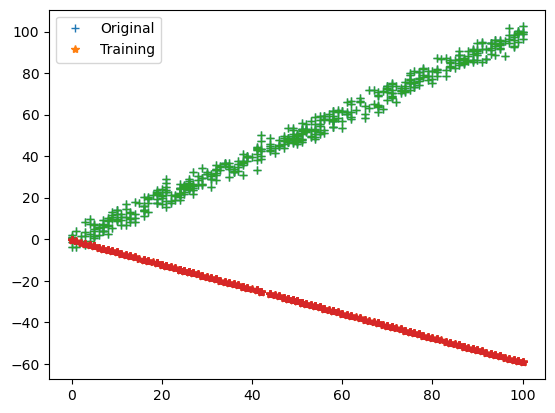

iteration=(2,),Loss=1885.6301946611932


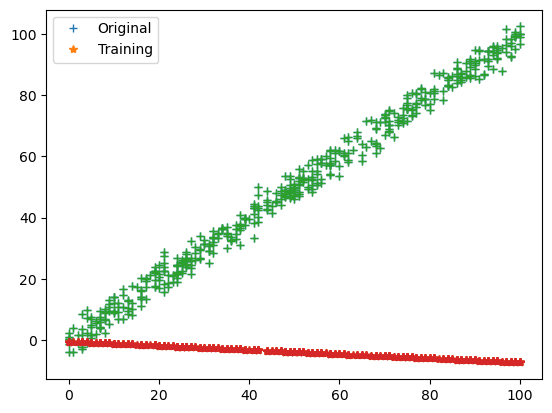

iteration=(3,),Loss=857.6535914023093


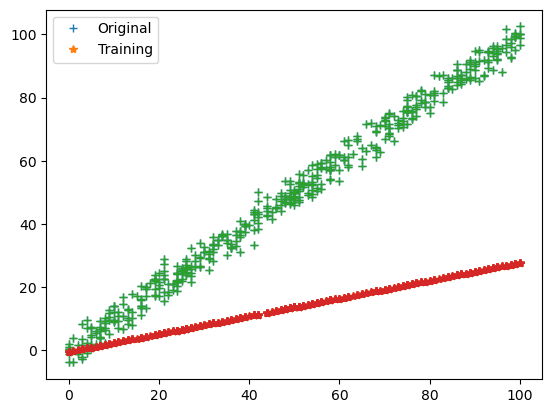

iteration=(4,),Loss=391.25946762978833


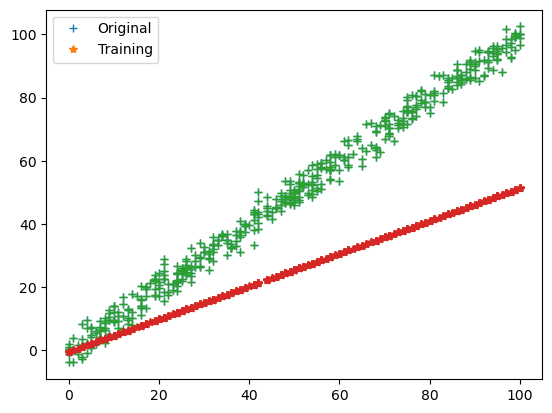

iteration=(5,),Loss=179.6559368321419


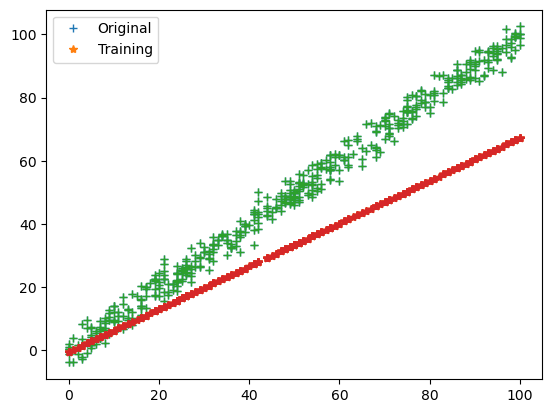

iteration=(6,),Loss=83.65118028377002


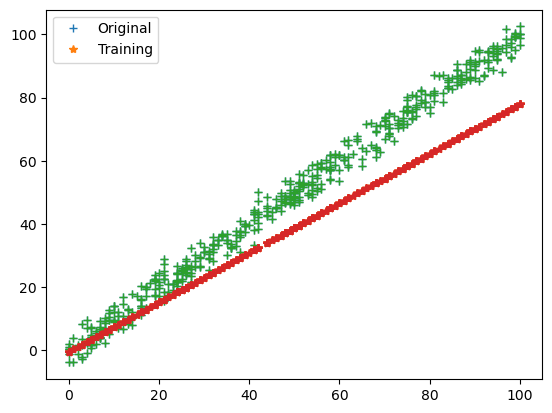

iteration=(7,),Loss=40.09371565427308


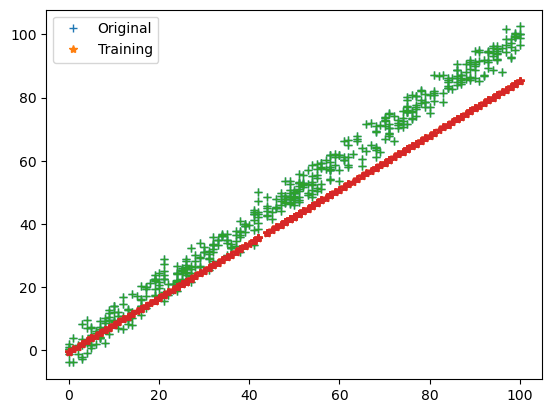

iteration=(8,),Loss=20.331645461164108


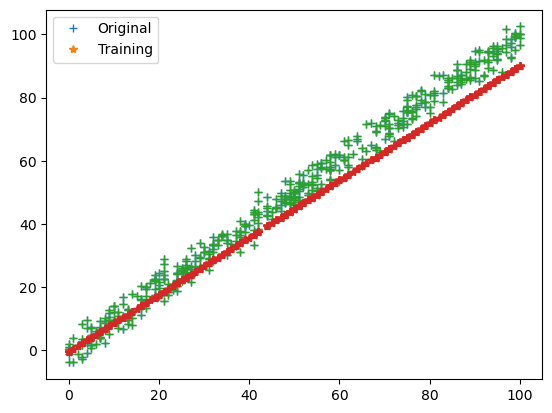

iteration=(9,),Loss=11.36557208061624


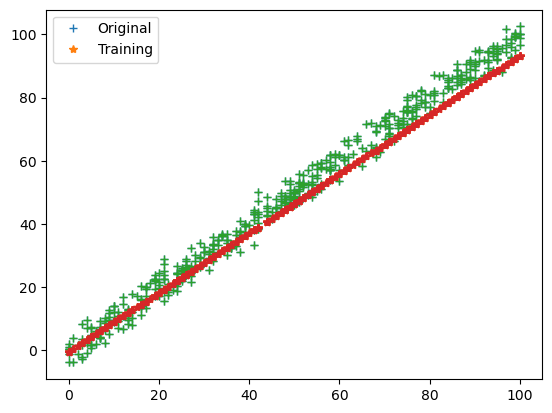

iteration=(10,),Loss=7.297654412030739


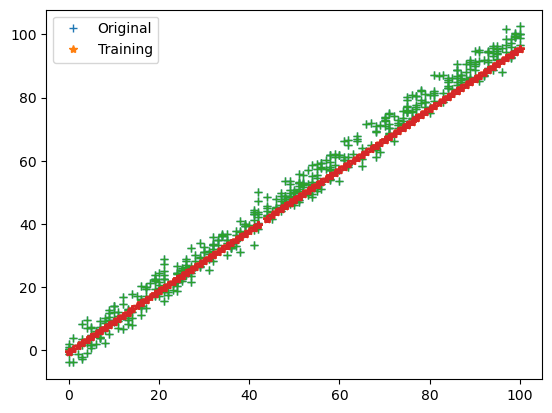

iteration=(11,),Loss=5.452035415373976


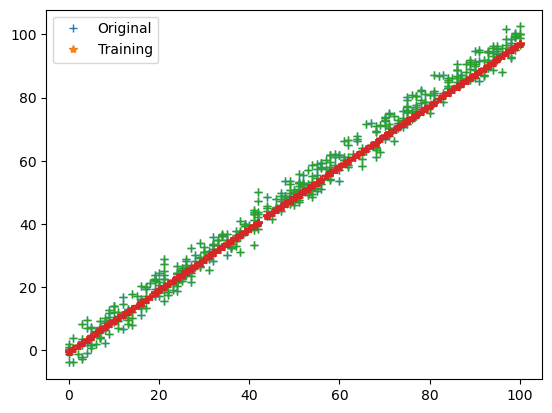

iteration=(12,),Loss=4.614675787693236


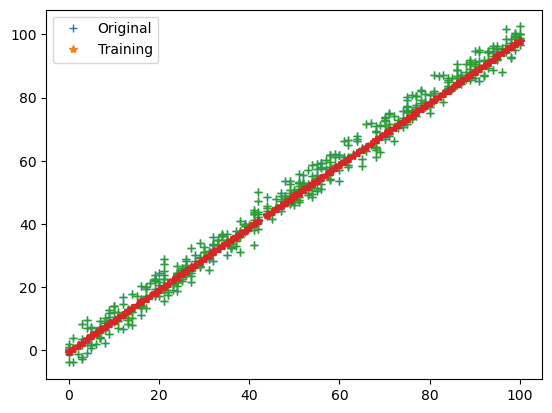

iteration=(13,),Loss=4.2347645525188575


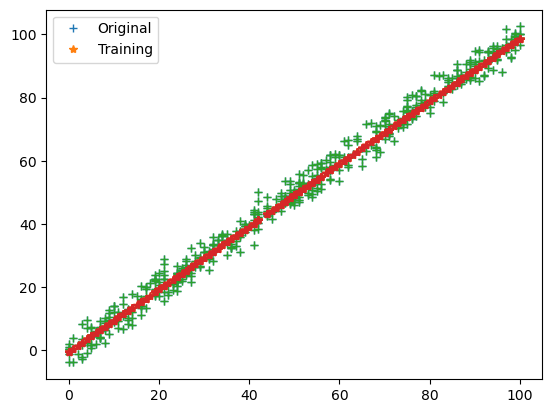

iteration=(14,),Loss=4.062398159725637


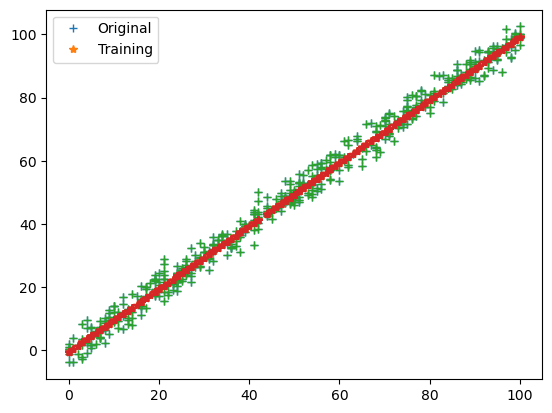

iteration=(15,),Loss=3.9841950918182873


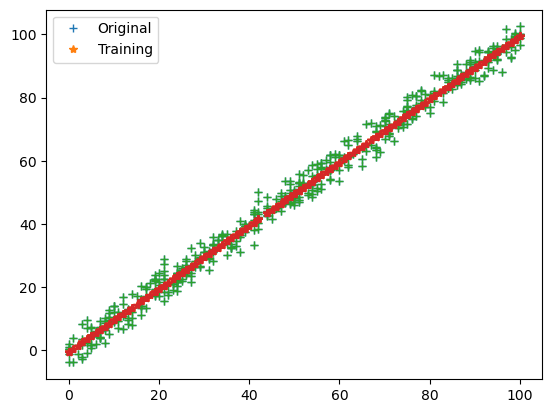

iteration=(16,),Loss=3.9487140287231552


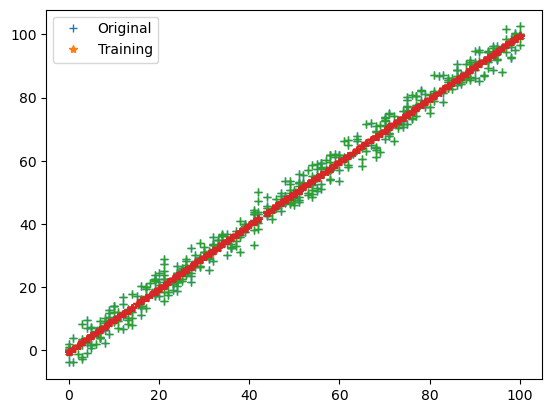

iteration=(17,),Loss=3.932615986544301


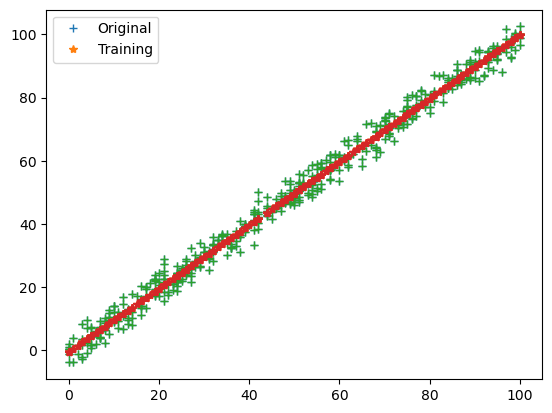

iteration=(18,),Loss=3.9253120424369126


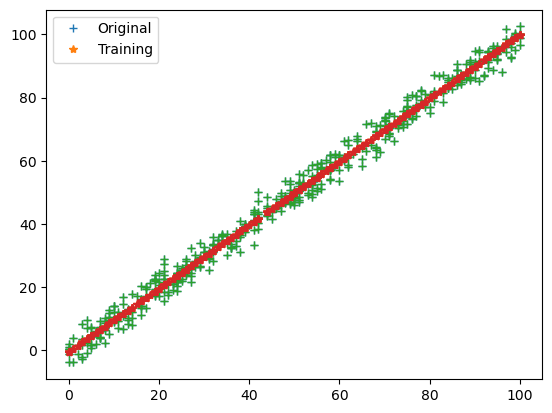

iteration=(19,),Loss=3.921997990377573


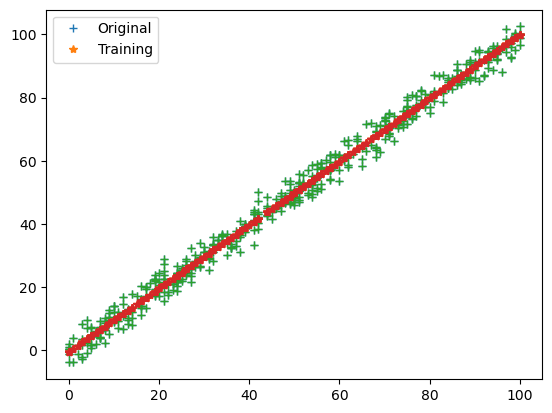

iteration=(20,),Loss=3.9204941567721185


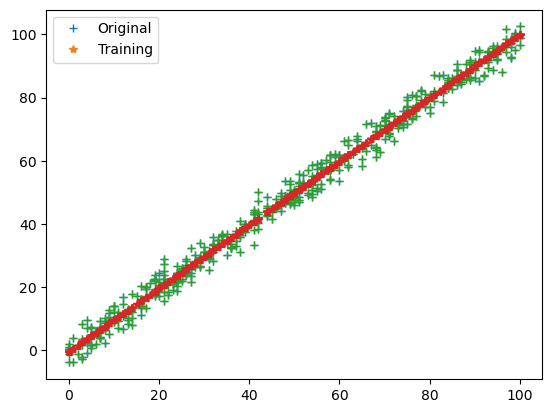

In [26]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [40]:
print(parameters)

m


In [41]:
test_prediction = test_input * parameters["m"] + parameters[c]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_prediction, '.')
plt.show()

TypeError: string indices must be integers, not 'str'